# Applied Machine Learning: Module 3 (Evaluation)

# Modelling Evaluation

## 1. Evaluation for Classification: Binary-Class Models

### Preamble - Classification method with imbalanced classes  - Accuracy Evaluation

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
df = digits.data
X, y = df, digits.target
labels = digits.target_names
print(digits.target.shape)
print(labels)

(1797,)
[0 1 2 3 4 5 6 7 8 9]


In [2]:
a = pd.DataFrame(digits.target,columns=['target'])
a['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [3]:
for class_name, class_count in zip(labels,np.bincount(digits.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [4]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced !=1] = 0

print('Original labels: ', y[1:30])
print('Original kind of labels: ', digits.target_names)
print('New binary labels: ', y_binary_imbalanced[1:30])
print('Binary kind of labels: ', pd.Series(y_binary_imbalanced).unique())

Original labels:  [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Original kind of labels:  [0 1 2 3 4 5 6 7 8 9]
New binary labels:  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Binary kind of labels:  [0 1]


In [5]:
print(np.bincount(y_binary_imbalanced))
print(pd.Series(y_binary_imbalanced).value_counts())
print('\n')
print(np.bincount(y))
print(pd.Series(y).value_counts())

[1615  182]
0    1615
1     182
dtype: int64


[178 182 177 183 181 182 181 179 174 180]
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64


In [6]:
# Testing the score of the binary classifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state=0)
svm = SVC(kernel='rbf',C=1).fit(X_train,y_train)
svm.score(X_test,y_test)

0.9955555555555555

** Is it this 90.8% of accuracy actually an impressive score? Does that it means a good model fit?** *For binary cmodels done on inbalanced datasets interms of class, we should test the validity of our score through the Dummy Classifiers*

### Dummy Classifiers

*The method for Dummy Classifiers consists in fitting the model to our Training Data, adding it with a strategy. In this case, we would apply it to the most frequent class, in a way that every predicted input will receive the dominant value (in this case, EVERY future/test input will receive the value 0. Then, THIS Dummy Classifier will predict the test data in order to detect how frequent is dominant class*.

In [7]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
print(dummy_majority)
y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions

DummyClassifier(strategy='most_frequent')


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
print(dummy_majority.score(X_test,y_test))
print('Difference btw SVM Score and Dummy Classifier Score: ',svm.score(X_test,y_test) - dummy_majority.score(X_test,y_test))

0.9044444444444445
Difference btw SVM Score and Dummy Classifier Score:  0.09111111111111103


**Basically the same score, so SVM is just slightly better than a model that simply, just predicts the same value (the dominant one) for every input, ignoring completely the insights of the input data. Therefore, we can say that a 0.9 score is not that good, so the SVM model was not optimal**

**Other strategies available to be used when fitting Dummy Classifiers**

**What if my Classifier accuracy is close to the null accuracy baseline?**

It is probably a sign of:

- Ineffective, erroneous or missing features (bad formation of the dataset we used)
- Bad choice of kernel or hyperparameter
- Large class imbalance

In [9]:
# Let's change the kernel parameter, from rbf to linear

svm = SVC(kernel='linear',C=1).fit(X_train, y_train)
svm.score(X_test,y_test)

0.9777777777777777

##### How to evaluate or detect those class inbalances, or whether the **model choice** is right or not on binary classification problems 

### Confusion matrices

###### Confusion matrices' structure

#### Binary (two-class) confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test,y_majority_predicted) # it compares both resulting datasets, from standard model (SVM) and dummys

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


So, according to the matrix, **407 out of 450 instances of the dummys classifier are true negatives** (same value for y_majority_predicted and y_test, and the value is the negative one, in this case 0), **while 43 are false negative**, this is, the predicted value by dummys is the negative one: 0 (most_frequent class), but the original data shows the positive one (1), so in y_test is 1. This helps us to conclude that the dummys classifier is able to predict correctly 403 of the 450 instances, and there's a divergence is just 43 of these outcomes. **There is no false positives nor true positives, as the dummys classifier is programmed just to give the value 0 (the negative one) as the output**. Therefore, the right column, that gives us how many positive class' values are in the dummys classifier (being or not in y_test), is empty.

In [11]:
# Dummys classifier with the strategy STRATIFIED instead of most_frequent

dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)
print(y_classprop_predicted, '\n')
print(dummy_classprop.score(X_test,y_test),'\n')
print('Random-class proportional prediction (dummy classifier)\n', confusion)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0] 

0.8 

Random-class proportional prediction (dummy classifier)
 [[367  40]
 [ 40   3]

In this case, there are 368/500 true negatives, while there are 3 true positives, which means there are **371** correctly predicted (which is less than what we've got from the previous strategy (407), and due to this, the accuracy has also decreased (0.81)).

**Let's apply the Confusion Matrix to compare the original y_test outcome with the linear-kernelized SVM, which improved the score of the rbf one**

In [12]:
svm = SVC(kernel='linear',C=1).fit(X_train, y_train)
print('Score: ',svm.score(X_test,y_test),'\n')

svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('SVM classifier (linear kernel, C=1)\n', confusion)

Score:  0.9777777777777777 

SVM classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


The linear kernelized SVC has 402+38(**440**) correct predictions and there are ten points of divergence here. The linearSVC predicts in 5 times a 1-class instance when y_test displays a 0, and predicts a 0 in another 5 times, when the y_test shows a 1.

**And let's apply it to the rbf-kernelized SVM model as well**

In [13]:
svmr = SVC(kernel='rbf',C=1).fit(X_train, y_train)
print('Score: ', svmr.score(X_test,y_test),'\n')

svmr_predicted = svmr.predict(X_test)
confusion = confusion_matrix(y_test, svmr_predicted)

print('SVM classifier (rbf kernel, C=1)\n', confusion)

Score:  0.9955555555555555 

SVM classifier (rbf kernel, C=1)
 [[407   0]
 [  2  41]]


**448** outcomes correctly predicted. 2 false negative and 0 false positive

**Applying it to a Logistic Regression model**

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
print('Score: ',lr.score(X_test,y_test),'\n')
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Score:  0.9688888888888889 

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**436** outcomes were correctly predicted. 6 false negative and 6 false positive

**Applying it to a DecisionTreeClassifier model**

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
print('Score: ', dt.score(X_test,y_test))
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Score:  0.9466666666666667
Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


**426** outcomes were correctly predicted. 17 false negative and 7 false positive

### Evaluation metrics for binary classification - Working over confusion matrices

- **Accuracy = (TP + TN) / N** - It basically measures the rate of predictions that are correct

- **Precision = TP / (TP + FP)** - It is really useful in ML projects in which it's important to avoid false positives. Premia que el modelo prediga bien los positivos y los negativos

- **False Positive Rate (FPR) = FP / (TN+FP)** - What fraction of all negative instances were incorrectly predicted (identified as positive by our predictor)

- **Recall = TP / (TP + FN)**  - Also known as sensitivity, or True Positive Rate. Ratio of the true positive instances of our predictor over all positive actual values (the ones predicted + the ones that are positive but were predicted as negative). It measures the relevancy of the model in relation to the study we are carrying out. We have to be particularly interested in retrieving the true positive values, without caring about the true negative ones. Sólo premia la precisión con los resultados positivos, sin importar cómo prediga los negativos

- **F1 = 2 x Precision x Recall / (Precision + Recall)** - This score measures the relationship btw precision and recall - **THE F-SCORE**

**The higher precision, the lower recall, so there's a tradeoff. Normally, the tasks that are looking for more precision and those that are moved by a better recall are so divergent**

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test,tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test,tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test,tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test,tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


**Classification Report - A matrix of the metrices**

**It gives as an output a matrix with the metrics result for each class + the avg**. The column "support" shows the number of presicted instances for each class. The variable "target names" should be filled with the name of the negative class and the positive class in that order

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test,tree_predicted,target_names=['not 1','1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [18]:
nclass,pclass = ('not 1','1')

print('Random class-proportional (dummy)\n',classification_report(y_test,y_classprop_predicted,target_names=[nclass, pclass]))
print('SVM\n', classification_report(y_test,svm_predicted,target_names=[nclass,pclass]))
print('Logistic Regression\n', classification_report(y_test,lr_predicted,target_names=[nclass,pclass]))
print('Decision tree\n', classification_report(y_test,tree_predicted,target_names=[nclass,pclass]))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.90      0.90       407
           1       0.07      0.07      0.07        43

    accuracy                           0.82       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.82      0.82      0.82       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic Regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

## Decision functions for classifiers

### The Decision_function score

**It provides, for each y_test instance, a classifier score value that indicates how confidently the classifier predicts the positive class (large magnitude positive values) or the negative class (large magnitude negative values), given X_test data**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

lr = LogisticRegression().fit(X_train,y_train)
y_scores_lr = lr.decision_function(X_test)
y_score_lr_list = list(zip(y_test[0:20],y_scores_lr[0:20]))
y_score_lr_list

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828782280210415),
 (0, -19.38287828688333),
 (0, -29.19845184251095),
 (0, -21.746258226804738),
 (0, -22.642382179367385),
 (0, -11.805951141253447),
 (1, 6.496009803108503),
 (0, -23.354604276557556),
 (0, -27.54372373365202),
 (0, -26.88821388119108),
 (0, -31.86290032248506),
 (0, -22.486093559799958),
 (0, -25.318021344078137),
 (0, -13.384529811312783),
 (0, -13.565634811916658),
 (0, -13.308365009597962),
 (1, 12.180899276728999),
 (0, -34.36244632999905),
 (0, -13.231533946271684),
 (0, -29.593971052068856)]

### The Predicted probability of class membership (predict_proba)

**It provides, for each y_test instance, a value btw 0 and 1 that indicates the probability of getting the positive class given X_test data**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_proba_lr = lr.fit(X_train,y_train).predict_proba(X_test)
y_proba_lr_list = list(zip(y_test[0:20],y_proba_lr[0:20,1].round(10)))
y_proba_lr_list

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 0.0),
 (0, 3.8e-09),
 (0, 0.0),
 (0, 4e-10),
 (0, 1e-10),
 (0, 7.46e-06),
 (1, 0.9984928248),
 (0, 1e-10),
 (0, 0.0),
 (0, 0.0),
 (0, 0.0),
 (0, 2e-10),
 (0, 0.0),
 (0, 1.5388e-06),
 (0, 1.2839e-06),
 (0, 1.6605e-06),
 (1, 0.9999948726),
 (0, 0.0),
 (0, 1.7932e-06),
 (0, 0.0)]

**Having these decision functions on the table, we would have to interpret them, which is done by fixing a previously set criteria called Decision Threshold**

## Precision-Recall graphic relationship

### The Precision-Recall Curve

**Plot that shows the relationship btw the recall (y-axis) and precision (x-axis) of a model, always in relation to the y_test outcome and knowing the X_test income**

*The top right corner means a better prediction as precision and recall are both perfect. The less steep the curve has the better, as precision would get bigger without affecting (or affecting the less the better) the Recall Score.*

<IPython.core.display.Javascript object>


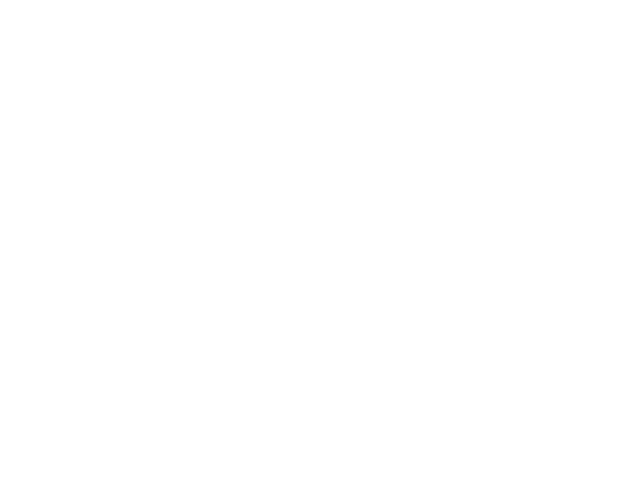

In [21]:
#PLOTTING A PRECISION-RECALL CURVE

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test,y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve',size=13)
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=11)
plt.ylabel('Recall', fontsize=11)
plt.show()

### The ROC Curve

**Plot that shows the relationship btw the True Positive Rate (RECALL) (y-axis) and False positive rate (FPR) (x-axis) of a model, always in relation to the y_test outcome and knowing the X_test income**

*Top left corner is the ideal one, as the false positive rate is 0 (zero positive values in the prediction that are negative in y_test, so every positive value in the prediction is positive in y_test). **--->** Perfect Recall and perfect precision in positive class (which does not mean a perfect precision, as there still could be false negatives - Error type 2).*

*Again, the steepness (less steep) is important as it maximizes TP Rate and reduces FP Rate*

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


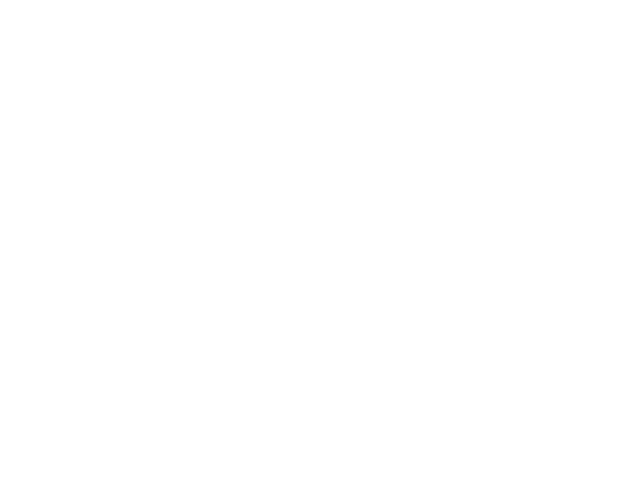

In [22]:
# PLOTTING A ROC CURVE

from sklearn.metrics import roc_curve, auc # auc = area under curve

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
y_score_lr = lr.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr) #false positive rate and true positive rate
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (auc-area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.plot([0, 1], [0, 1], color='black', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


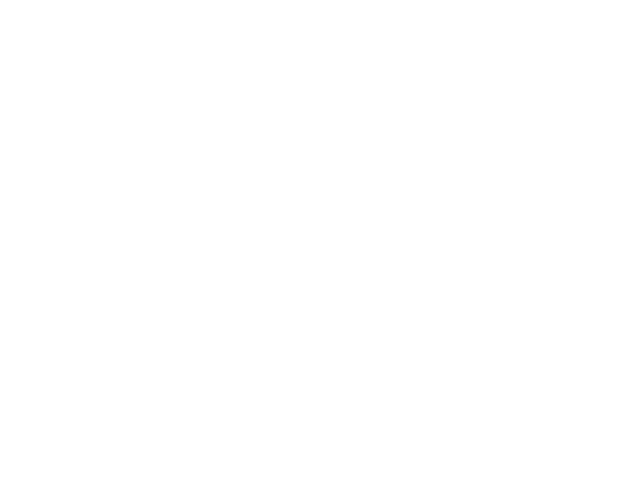

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [23]:
# PLOTTING A ROC CURVE for a SVC model with different levels of gamma (G)

from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='y', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

## 2. Evaluation for Classification Models: Multi-Class Evaluation

 ### Multi-class confusion matrix

<IPython.core.display.Javascript object>


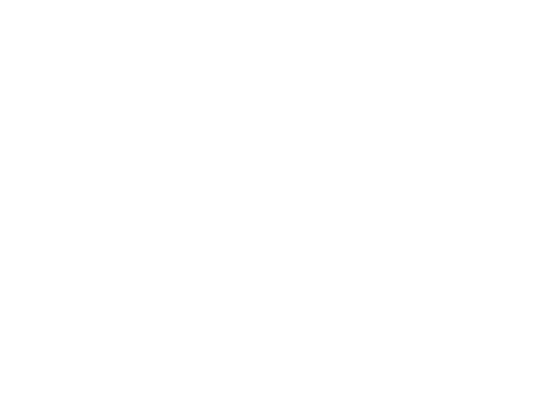

<IPython.core.display.Javascript object>


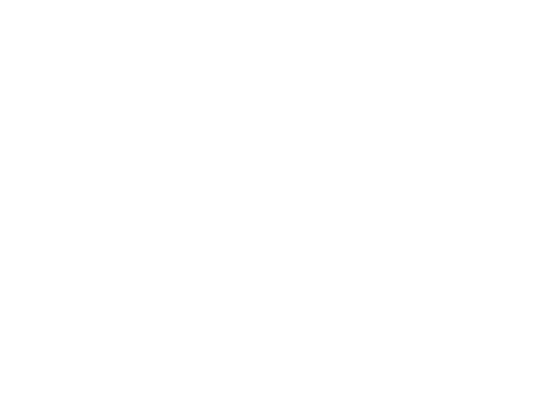

In [24]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

svm = SVC(kernel='rbf').fit(X_train_mc,y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc,svm_predicted_mc)
df_cm2 = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm2,annot=True)
plt.title('SVM rbf Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

Above we can see the plotting of two confusion matrices. The first of it corresponds to a SVC model with linear kernel, which is able to get a high 0.971 accuracy score. The most common error registered in the model is spotted on the true label 8, which was predicted as a 1 three times in the model.

The second one corresponds to a much more imperfect SVM rbf kernel, which registered a fewer amount of true positives (DIAGONAL) and a bunch of false negatives concentrated on the predicted digit 4. The accuracy is, no wonder, lower than 0.5

### Multi-class classification report

In [25]:
print(classification_report(y_test_mc,svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



### Micro- vs. macro-averaged metrics

In [26]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [27]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


In [28]:
print('Micro-averaged Recall = {:.2f} (treat instances equally)'
      .format(recall_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged Recall = {:.2f} (treat classes equally)'
      .format(recall_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged Recall = 0.99 (treat instances equally)
Macro-averaged Recall = 0.99 (treat classes equally)


Micro and macro averages are two different ways of ponderating classes and instances values when averaging metrics scores for a prediction. We could do basically a normal division, which is a **micro-averaged method** calculation (no matter the class, we just divide the number of coincidences btw real and predicted instances by the total number of instances). The **macro-averaged method** consists in dividing the coincidences by the total FOR EACH CLASS, and then adding up each class' rate and dividing it by the number of classes (if there are 3 classes, we divide it by 3). Micro and macro have to be the highest posible, and also be equal among them.

## 3. Evaluation for Regression Models

### Regression Metrics

Typically, r2_score is enough to know the accuracy of the regression (best is 1 and constant prediction score is 0).
Alternative metrics include:

- mean_absolute_error -> abs difference of target and predicted value
- mean_squared_error -> squared diff of target and predicted value
- median_absolute_error -> robust to outliers - If we want to exclude outliers (particularly if the errors are very few in number but are large)

### Regression Evaluation: Dummy Regressors

<img src="W3Captura9.PNG">

The only use of dummy regressors for testing is to providing a baseline to compare our regressor with a dummy random value generator. The score of the above dummy model would be 0, as it always provides a constant output for any instance

Linear model, coefficients:  [-698.80206267]
Linear model, intercept:  151.80112406729896
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


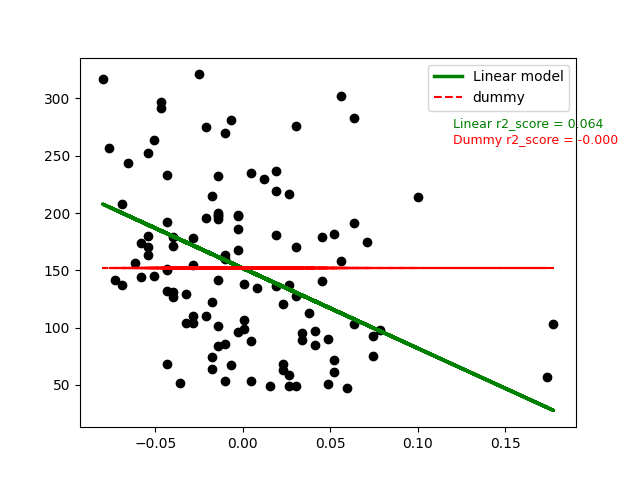

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()
X= diabetes.data[:,None,6]
y= diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print('Linear model, intercept: ', lm.intercept_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green',linewidth=2.5, label='Linear model')
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', label = 'dummy')
plt.legend()
plt.annotate('Linear r2_score = {:.3f}'.format(r2_score(y_test,y_predict)),xy=(0.12,275),size=9,color='green')
plt.annotate('Dummy r2_score = {:.3f}'.format(r2_score(y_test,y_predict_dummy_mean)),xy=(0.12,260),size=9,color='red')
plt.show()

## 4- Model selection using evaluation metrics

#### Cross-validation case

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
X,y= dataset.data,dataset.target==1 # digit 1 will be the positive class, and not 1 the negative one as in previous examples
clf = SVC(kernel='linear',C=1)

#Relying on accuracy
print('Cross-validation(accuracy)', cross_val_score(clf,X,y,cv=5))

#Relying on Area-under-the-curve
print('Cross-validation(AUC)', cross_val_score(clf,X,y,cv=5,scoring='roc_auc'))

#Relying on Recall
print('Cross-validation (recall)',cross_val_score(clf,X,y,cv=5,scoring='recall'))

Cross-validation(accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation(AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search case

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X,y = dataset.data,dataset.target==1
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

clf = SVC(kernel='rbf')
grid_values = {'gamma':[0.001,0.01,0.05,0.1,1,10,100]}

# default metric to optimize over grid parameters: accuracy

grid_clf_acc = GridSearchCV(clf,param_grid=grid_values)
grid_clf_acc.fit(X_train,y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)

print('Grid best parameter (max.accuracy):', grid_clf_acc.best_params_)
print('Grid best score(accuracy):', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: aoc

grid_clf_auc = GridSearchCV(clf,param_grid = grid_values,scoring='roc_auc')
grid_clf_auc.fit(X_train,y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max.accuracy): {'gamma': 0.001}
Grid best score(accuracy): 0.9985157648354676
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


### Binary-class classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

<IPython.core.display.Javascript object>


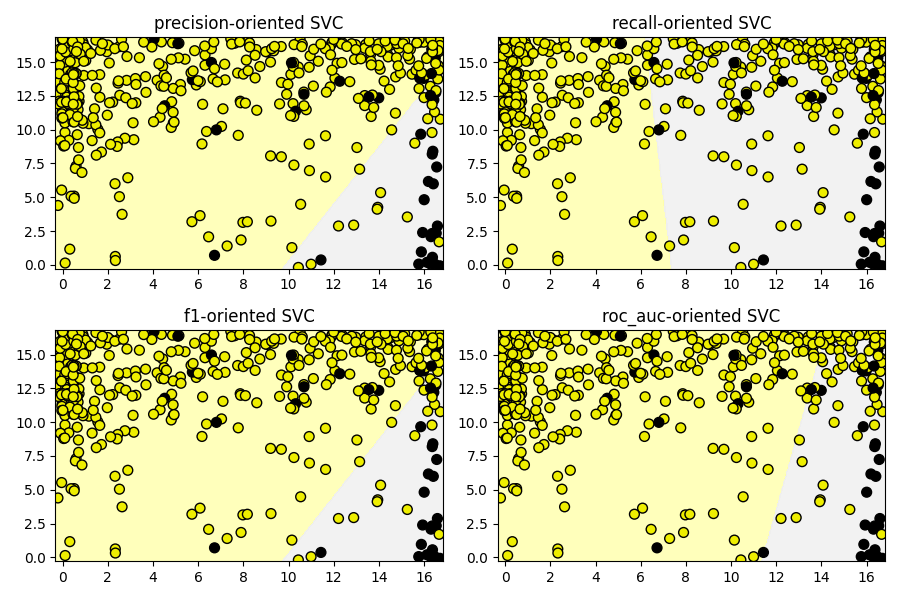

Grid best parameter (max. precision): {'class_weight': {1: 3}}
Grid best score (precision): 0.5345073989111795
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9214285714285714
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5641400993523235
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8966645220323077


In [32]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

dataset = load_digits()
X, y = dataset.data, dataset.target==1
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.

jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+np.random.rand(X_train.shape[0],2)-jitter_delta
X_twovar_test = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}

plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

<IPython.core.display.Javascript object>


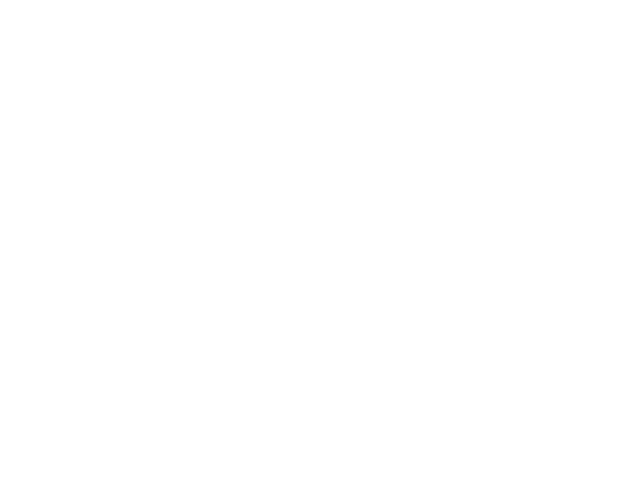

<IPython.core.display.Javascript object>


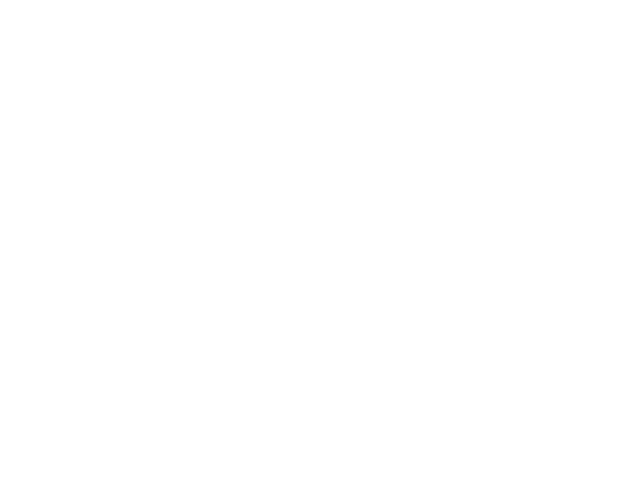

Text(0.45, 0.95, 'At zero threshold, precision: 0.21, recall: 0.74')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta


clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision,recall,thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
plt.annotate('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r),xy=(0.45,0.95),size=8,color='red')